# TP : Analyse de la transpiration des plantes
Ce notebook analyse les données de pesée pour extraire la transpiration nette des plantes.

# 1. Importation des librairies nécessaires

In [3]:
# Importation des librairies, on leur donne des aliases pour faciliter leur utilisation, pas obligatoire
import pandas as pd
import matplotlib.pyplot as plt

# 2. Chargement des données

In [4]:
# Lecture des données (on utilise sep="\t" car ton texte semble tabulé)
df = pd.read_csv("data_tutorial.csv", sep=",", decimal=",") # Modifier si nécessaire sur base du format réel du fichier
# sep = ","  # Exemple de modification si le fichier utilise des virgules comme séparateurs
# sep = ";"  # Exemple de modification si le fichier utilise des points-virgules comme séparateurs
# sep = "\t"  # Exemple de modification si le fichier utilise des tabulations comme séparateurs
# decimal = ","  # Exemple de modification si le fichier utilise des virgules comme séparateurs décimaux
# decimal = "."  # Exemple de modification si le fichier utilise des points comme séparateurs décimaux

# Affichage des premières lignes pour vérification
print("Aperçu des données chargées :")
df.head()


Aperçu des données chargées :


,Date_Heure,Bal1,Bal2,Bal3,Bal4,Bal5,Bal6
0,2025-01-30 13:57:15 UTC,0.00,0.00,0.00,0.00,0.00,0.00
1,2025-01-30 14:07:15 UTC,-2.24,-0.04,-1.51,-0.02,0.39,-0.03
2,2025-01-30 14:17:14 UTC,-2.26,-0.08,-2.47,-0.07,0.48,-0.05
3,2025-01-30 14:27:14 UTC,-1.95,-0.11,-1.81,-0.10,0.54,-0.06
4,2025-01-30 14:37:14 UTC,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09


On peut lire n'importe quel type de fichier, certains demandent l'importation d'un package spécifique

In [5]:
import openpyxl
df = pd.read_excel("data_tutorial.xlsx", decimal=",")
df.head()

,Date_Heure,Bal1,Bal2,Bal3,Bal4,Bal5,Bal6
0,2025-01-30 13:57:15 UTC,0.00,0.00,0.00,0.00,0.00,0.00
1,2025-01-30 14:07:15 UTC,-2.24,-0.04,-1.51,-0.02,0.39,-0.03
2,2025-01-30 14:17:14 UTC,-2.26,-0.08,-2.47,-0.07,0.48,-0.05
3,2025-01-30 14:27:14 UTC,-1.95,-0.11,-1.81,-0.10,0.54,-0.06
4,2025-01-30 14:37:14 UTC,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09


In [6]:
# Nettoyage de la date (on retire " UTC" pour faciliter la conversion)
df["Date_Heure"] = df["Date_Heure"].str.replace(" UTC", "") # Retirer " UTC" si présent
df["Date_Heure"] = pd.to_datetime(df["Date_Heure"]) # Convertir en datetime, un format standard pour les dates
# Faire uniquement si nécessaire en fonction du format réel des dates dans le fichier


In [7]:
display(df.head())  # la fonction display est plus adaptée dans les notebooks pour afficher les DataFrames

,Date_Heure,Bal1,Bal2,Bal3,Bal4,Bal5,Bal6
0,2025-01-30 13:57:15,0.00,0.00,0.00,0.00,0.00,0.00
1,2025-01-30 14:07:15,-2.24,-0.04,-1.51,-0.02,0.39,-0.03
2,2025-01-30 14:17:14,-2.26,-0.08,-2.47,-0.07,0.48,-0.05
3,2025-01-30 14:27:14,-1.95,-0.11,-1.81,-0.10,0.54,-0.06
4,2025-01-30 14:37:14,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09


# 3. Calcul de nouvelle variable

In [8]:
# On peut maintenant calculer une nouvelle variable, par exemple la somme des balances (que ça soit utile ou non) :
df["Sum_all"] = df[["Bal1", "Bal2", "Bal3", "Bal4", "Bal5", "Bal6"]].sum(axis=1)
# On peut décider de n'avoir que les heures minutes si les jours ne sont pas nécessaires: 
df['hm'] = pd.to_datetime(df['Date_Heure'], format="%H:%M")
display(df.head())

,Date_Heure,Bal1,Bal2,Bal3,Bal4,Bal5,Bal6,Sum_all,hm
0,2025-01-30 13:57:15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2025-01-30 13:57:15
1,2025-01-30 14:07:15,-2.24,-0.04,-1.51,-0.02,0.39,-0.03,-3.45,2025-01-30 14:07:15
2,2025-01-30 14:17:14,-2.26,-0.08,-2.47,-0.07,0.48,-0.05,-4.45,2025-01-30 14:17:14
3,2025-01-30 14:27:14,-1.95,-0.11,-1.81,-0.10,0.54,-0.06,-3.49,2025-01-30 14:27:14
4,2025-01-30 14:37:14,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09,-6.95,2025-01-30 14:37:14


# 4. Réaliser un graphe

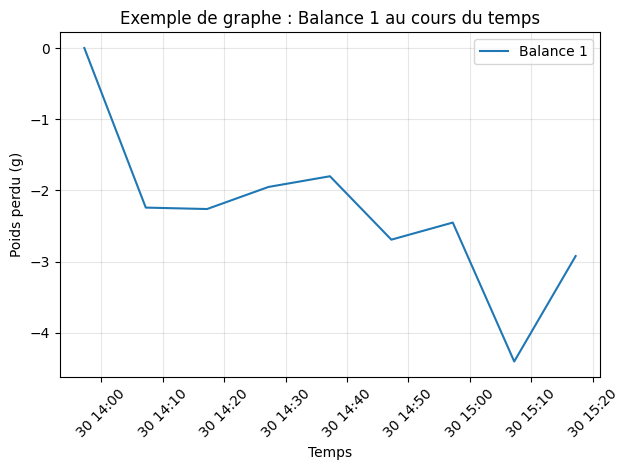

In [9]:
plt.figure() 
plt.plot(df["hm"], df["Bal1"], label="Balance 1")
plt.title("Exemple de graphe : Balance 1 au cours du temps") # Ajout du titre du graphe
plt.xlabel("Temps") # Ajout de l'étiquette de l'axe x
plt.ylabel("Poids perdu (g)") # Ajout de l'étiquette de l'axe y
plt.legend() # Ajout de la légende pour identifier les courbes
plt.xticks(rotation=45) # Rotation des labels de l'axe x pour meilleure lisibilité
plt.grid(True, alpha=0.3) # Ajout d'une grille pour faciliter la lecture des valeurs
plt.tight_layout() # Ajustement de la mise en page pour éviter le chevauchement
plt.show()

L'axe des X n'a pas un affichage très propre, On peut forcer cela, ici, on va décider d'afficher uniquement les heures et minutes.

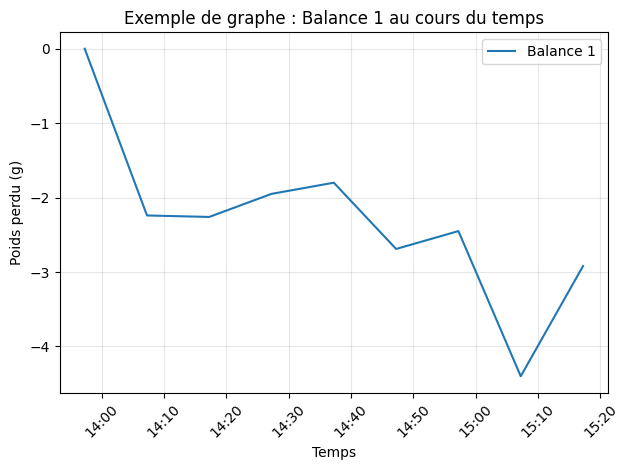

In [23]:
import matplotlib.dates as mdates
ax = plt.gca() 
# On ne garde que l'heure et les minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) # Formatage des dates sur l'axe x
plt.plot(df["hm"], df["Bal1"], label="Balance 1")
plt.title("Exemple de graphe : Balance 1 au cours du temps") # Ajout du titre du graphe
plt.xlabel("Temps") # Ajout de l'étiquette de l'axe x
plt.ylabel("Poids perdu (g)") # Ajout de l'étiquette de l'axe y
plt.legend() # Ajout de la légende pour identifier les courbes
plt.xticks(rotation=45) # Rotation des labels de l'axe x pour meilleure lisibilité
plt.grid(True, alpha=0.3) # Ajout d'une grille pour faciliter la lecture des valeurs
plt.tight_layout() # Ajustement de la mise en page pour éviter le chevauchement
plt.show()

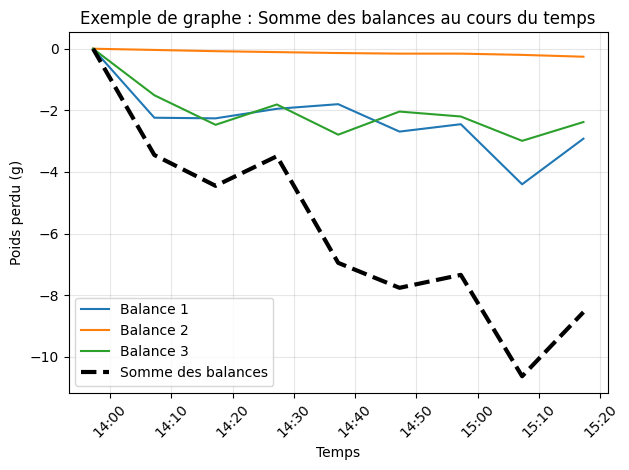

In [24]:
plt.figure()
ax = plt.gca() 
# On ne garde que l'heure et les minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) # Formatage des dates sur l'axe x
plt.plot(df["hm"], df["Bal1"], label="Balance 1")
plt.plot(df["hm"], df["Bal2"], label="Balance 2")
plt.plot(df["hm"], df["Bal3"], label="Balance 3")
plt.plot(df["hm"], df["Sum_all"], label="Somme des balances", linewidth=3, color='black', linestyle='--')
plt.title("Exemple de graphe : Somme des balances au cours du temps") # Ajout du titre du graphe
plt.xlabel("Temps")
plt.ylabel("Poids perdu (g)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

On peut tout simplement afficher les mesures par groupes aussi, que cela ait du sens ou non

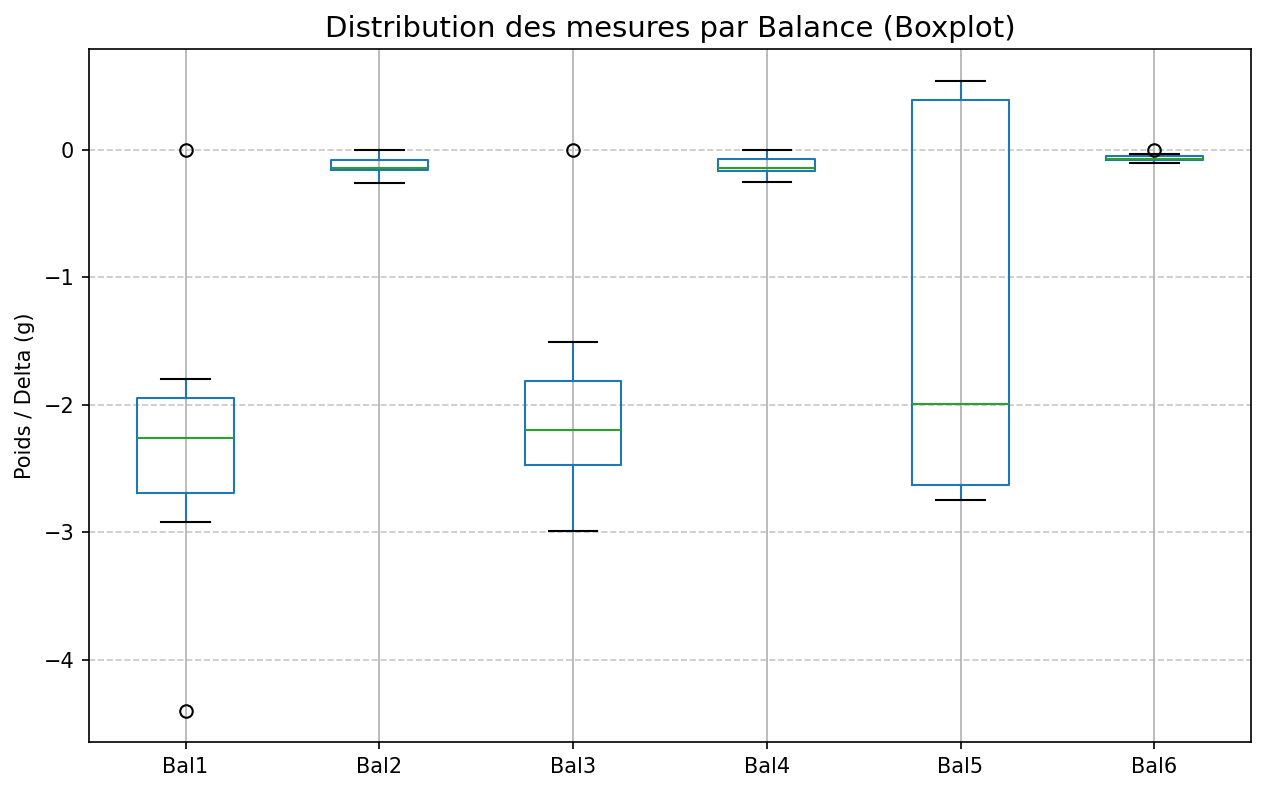

In [25]:
# Sélection des colonnes de balances (Bal1 à Bal6)
cols_balances = ["Bal1", "Bal2", "Bal3", "Bal4", "Bal5", "Bal6"]

plt.figure(figsize=(10, 6), dpi=150)
df[cols_balances].boxplot()

plt.title("Distribution des mesures par Balance (Boxplot)", fontsize=14)
plt.ylabel("Poids / Delta (g)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
